In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# load dataset
file_path = '/content/drive/MyDrive/Office_Analyst_works/Datasets/TODwiseOrderDetails.csv'
try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print("File not found. Please check the file path.")
  # Handle the error appropriately, e.g., exit the program or use a default dataset.
  exit() # Or handle the error in a different way

In [4]:
df.sample(10)

,Order No,Order Date,Buyer,Style No,Style Name,Season,LC/SC No,Merchandiser,TOD date,Order Qty,FOB,Total FOB,CM,Total CM
726,365723-8757,04-Mar-2025,H&M,1257452 - Easy iron L/S shirt,Easy iron L/S shirt,2-2025,MGSL/H&M-Mens DBL-S.02,Fakrul,26-May-2025,525,2.25,"1,181.25",0.86,451.50
221,MNSSBG4196684,16-Dec-2024,Best Seller,17155596 - PCPOPPY LS OXFORD LOOSE,PCPOPPY LS OXFORD LOOSE,NOOS AW 25,Bestseller PIECES/ 2,Sourov,30-Apr-2025,711,6.00,"4,266.00",1.59,"1,130.49"
51,1191202,19-Sep-2024,Primark,12102 -,NaN,SS2025,Primark/75,Sourov,21-Apr-2025,"26,265",5.01,"131,587.65",1.05,"27,578.25"
473,YC8520113-01,04-Feb-2025,NEXT,F19967 - F19967,F19967,AW25,NaN,AKZilani,20-May-2025,"1,100",8.83,"9,713.00",1.96,"2,156.00"
415,355323-7657,18-Feb-2025,H&M,1289753 - TINTIN structure L/S Shirt,TINTIN structure L/S Shirt,2-2025,MGSL/H&M Kids S2,Shohel,19-May-2025,595,3.14,"1,868.30",1.01,603.03
938,1200318,04-Dec-2024,Primark,18471 -,NaN,AW2025,Primark Lingerie-AW24,Babu,19-Jun-2025,"41,960",3.65,"153,154.00",1.18,"49,512.80"
1332,0110890169701,27-Jan-2025,EL CORTE INGLES,W25606H226 -,NaN,NaN,ECI-AW25,Nooruddin,30-Jul-2025,"2,000",8.10,"16,200.00",2.10,"4,200.00"
1152,1066497,26-Feb-2025,HAGGAR CLOTHING CO.,HW00494A -,NaN,FA25,HAGGAR-USA-03-2024,Ratna,13-Jul-2025,"1,050",5.37,"5,638.50",1.75,"1,837.50"
96,385420-1515,01-Apr-2025,H&M,0925212 - Robin oxford shirt,Robin oxford shirt,2-2025,MGSL/Women Shirt S.2,Alamgir,21-Apr-2025,"3,853",4.95,"19,072.35",1.25,"4,816.25"
427,365378-7657,04-Mar-2025,H&M,1289801 - BERKLEY L/S Shirt,BERKLEY L/S Shirt,2-2025,MGSL/H&M Kids S2,Shohel,19-May-2025,481,2.49,"1,197.69",0.86,415.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order No      1435 non-null   object 
 1   Order Date    1435 non-null   object 
 2   Buyer         1435 non-null   object 
 3   Style No      1435 non-null   object 
 4   Style Name    1087 non-null   object 
 5   Season        1143 non-null   object 
 6   LC/SC No      1350 non-null   object 
 7   Merchandiser  1435 non-null   object 
 8   TOD date      1435 non-null   object 
 9   Order Qty     1435 non-null   object 
 10  FOB           1435 non-null   float64
 11  Total FOB     1435 non-null   object 
 12  CM            1435 non-null   float64
 13  Total CM      1435 non-null   object 
dtypes: float64(2), object(12)
memory usage: 157.1+ KB


In [ ]:
df.describe()

,FOB,CM
count,1435.000000,1435.000000
mean,4.905401,1.234899
std,2.427968,0.712431
min,0.000000,0.000000
25%,3.260000,0.910000
50%,4.610000,1.150000
75%,5.500000,1.430000
max,23.350000,5.400000


In [ ]:
df.isnull().sum()

,0
Order No,0
Order Date,0
Buyer,0
Style No,0
Style Name,348
Season,292
LC/SC No,85
Merchandiser,0
TOD date,0
Order Qty,0


In [ ]:
df.duplicated().sum()

np.int64(3)

In [6]:
df.isnull()

,Order No,Order Date,Buyer,Style No,Style Name,Season,LC/SC No,Merchandiser,TOD date,Order Qty,FOB,Total FOB,CM,Total CM
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1431,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
Order No,0
Order Date,0
Buyer,0
Style No,0
Style Name,348
Season,292
LC/SC No,85
Merchandiser,0
TOD date,0
Order Qty,0


In [8]:
df.fillna(0, inplace=True)


In [9]:
df.isnull().sum()

,0
Order No,0
Order Date,0
Buyer,0
Style No,0
Style Name,0
Season,0
LC/SC No,0
Merchandiser,0
TOD date,0
Order Qty,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order No      1435 non-null   object 
 1   Order Date    1435 non-null   object 
 2   Buyer         1435 non-null   object 
 3   Style No      1435 non-null   object 
 4   Style Name    1435 non-null   object 
 5   Season        1435 non-null   object 
 6   LC/SC No      1435 non-null   object 
 7   Merchandiser  1435 non-null   object 
 8   TOD date      1435 non-null   object 
 9   Order Qty     1435 non-null   int64  
 10  FOB           1435 non-null   float64
 11  Total FOB     1435 non-null   object 
 12  CM            1435 non-null   float64
 13  Total CM      1435 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 157.1+ KB


In [ ]:
df.columns

Index(['Order No', 'Order Date', 'Buyer', 'Style No', 'Style Name', 'Season',
       'LC/SC No', 'Merchandiser', 'TOD date', 'Order Qty', 'FOB', 'Total FOB',
       'CM', 'Total CM'],
      dtype='object')

In [ ]:
df['Order No'].value_counts()

,count
Order No,
376859-7613,9
376858-7613,9
376857-7613,9
349716-7657,9
376827-7657,9
...,...
2180624,1
YC8520090-01,1
2190404,1


## Finding Insights The Data

## Order No. wise total No. of Quantity

In [ ]:
order_wise_quantity = df.groupby('Order No')['Order Qty'].sum()
order_wise_quantity

,Order Qty
Order No,
B4201077,2000
0103690367601,12200
0110890167101,2200
0110890167201,5000
0110890167301,2200
...,...
YC8520061-01,730
YC8520087-01,2905
YC8520090-01,1650


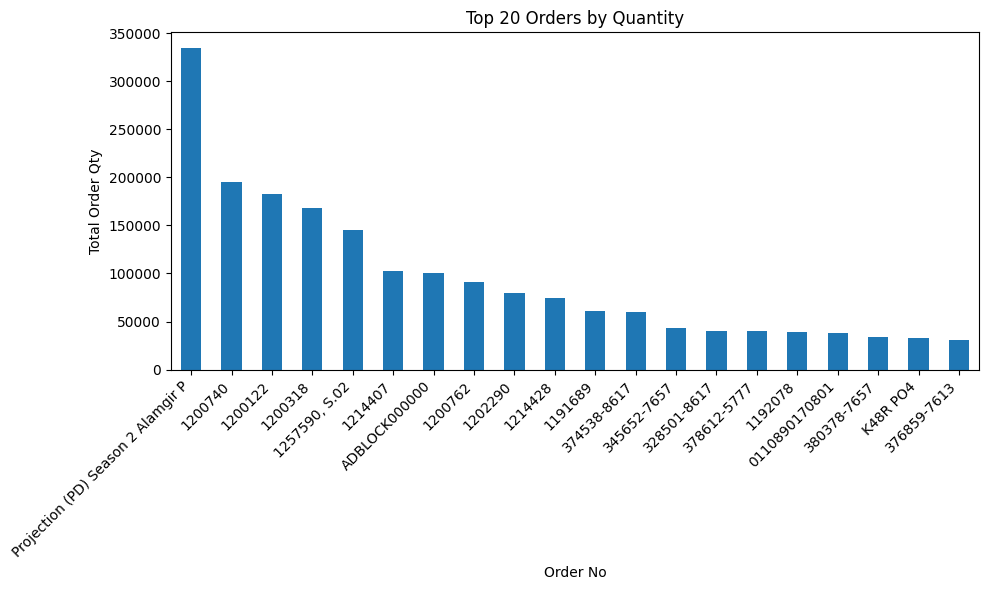

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove commas and convert to numeric
df['Order Qty'] = df['Order Qty'].str.replace(',', '').astype(int)

# Group by Order No (in case you have multiple rows per order)
order_wise_quantity = df.groupby('Order No')['Order Qty'].sum()

# Plotting
plt.figure(figsize=(10, 6))
order_wise_quantity.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Orders by Quantity')
plt.xlabel('Order No')
plt.ylabel('Total Order Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df.sample(10)

,Order No,Order Date,Buyer,Style No,Style Name,Season,LC/SC No,Merchandiser,TOD date,Order Qty,FOB,Total FOB,CM,Total CM
1052,0110890168601,14-Jan-2025,EL CORTE INGLES,W25602H220 -,0,0,ECI-AW25,Nooruddin,30-Jun-2025,1000,10.00,"10,000.00",2.50,"2,500.00"
1236,0198490135301,28-Jan-2025,EL CORTE INGLES,W25UTOPFSANTO -,0,0,ECI-AW25,Nooruddin,15-Jul-2025,3200,6.00,"19,200.00",1.90,"6,080.00"
1145,1066530,26-Feb-2025,HAGGAR CLOTHING CO.,HW00494A -,0,FA25,HAGGAR-USA-03-2024,Ratna,13-Jul-2025,246,5.37,"1,321.02",1.75,430.50
1351,377051-7613,19-Mar-2025,H&M,1298296 - DENICE CORD SKIRT,DENICE CORD SKIRT,2-2025,MGSL/H&M Kids S2,Shohel,04-Aug-2025,511,3.24,"1,655.64",1.04,532.92
209,355598-5777,18-Feb-2025,H&M,1273693 - CA Ronald Structure SS Shirt,CA Ronald Structure SS Shirt,1-2025,MGSL/H&M-Mens DBL-S.0,Fakrul,28-Apr-2025,182,5.22,950.04,1.34,243.88
1426,382243-7613,26-Mar-2025,H&M,1298752 - HARRIET CORD DRESS,HARRIET CORD DRESS,2-2025,MGSL/H&M Kids S2,Shohel,24-Nov-2025,383,4.87,"1,865.21",1.17,448.11
1379,2190908,13-Mar-2025,Springfield,322094 - 2LS134,2LS134,Autumn/Winter-2025/2026,MG-SPF-2024,Ratna,12-Aug-2025,2040,5.20,"10,608.00",0.00,-
318,0154190326401,12-Dec-2024,EL CORTE INGLES,W25BOCOXF -,0,0,CESITF2500009,Nooruddin,10-May-2025,3500,3.20,"11,200.00",1.25,"4,375.00"
363,243785-8757,11-Feb-2025,H&M,1234151 - Adrien Reg L/S shirt,Adrien Reg L/S shirt,1-2025,MGSL/H&M-Mens DBL-S.0,Fakrul,12-May-2025,198,3.46,685.08,0.00,-
464,2180585,12-Oct-2024,Springfield,1162684 - 2BX193,2BX193,Autumn/Winter-2025/2026,MG-CTF-014,Babu,20-May-2025,60,4.40,264.00,1.05,63.00


## Order Wise today order quantity export

In [ ]:
import datetime as dt

today = dt.date.today()
# Convert 'Order Date' to datetime objects if it's not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter for today's orders
today_orders = df[df['Order Date'].dt.date == today]

# Group by 'Order No' and sum 'Order Qty' for today's orders
order_wise_today_quantity = today_orders.groupby('Order No')['Order Qty'].sum()


# Export the result to a CSV file
order_wise_today_quantity.to_csv('order_wise_today_quantity.csv')

print("Order wise today's quantity exported to 'order_wise_today_quantity.csv'")


Order wise today's quantity exported to 'order_wise_today_quantity.csv'


In [ ]:
# Assuming 'Buyer' and 'Style Name' are columns in your DataFrame 'df'

buyer_wise_stylename = df.groupby('Buyer')['Style Name'].unique()
buyer_wise_stylename


,Style Name
Buyer,
Best Seller,"[NKMKADE LS SHIRT, NLFLYNDT LW PLEAT LOOSE, NM..."
"COLONY BRANDS ,INC","[6551568, 6551569, 6551564, 6551562, 6551563]"
"Colony Brands, INC","[6547445, 6547447, 6547446, 6547456, 6547457, ..."
DK Company,"[SDRIKER, SavannaPW SH, NatinkaPW SH]"
EL CORTE INGLES,"[0, 56353S7, W25TACMINI, 56353F1, 56353F2, ADB..."
Fashion Fleet Clothing,"[KHLFA001, KHLFA004, KHLFA002]"
H&M,"[BERKLEY L/S Shirt, CA Keith REG Structure SS,..."
HAGGAR CLOTHING CO.,[0]
HONGKONG CH COMPANY LIMITED,"[B4201022, B4201004, B4201016, B4201032, B4201..."


In [ ]:
# count no of multiple stylename

import pandas as pd

# Assuming your DataFrame is named 'df'
def count_stylenames(df):

    try:
        buyer_style_counts = df.groupby('Buyer')['Style Name'].nunique()
        return buyer_style_counts
    except KeyError:
        print("Error: 'Buyer' or 'Style Name' column not found in DataFrame.")
        return None



In [ ]:
df.columns


Index(['Order No', 'Order Date', 'Buyer', 'Style No', 'Style Name', 'Season',
       'LC/SC No', 'Merchandiser', 'TOD date', 'Order Qty', 'FOB', 'Total FOB',
       'CM', 'Total CM'],
      dtype='object')

In [11]:
# Assuming 'TOD' is a column representing Time of Delivery date, and it's already in datetime format.
# If not, convert it using pd.to_datetime(df['TOD']) if needed.

def analyze_orders(df):
    try:
        # Group by 'Buyer', 'Style Name', and 'TOD', then sum 'Order Qty'
        result = df.groupby(['Buyer', 'Style Name', 'TOD date'])['Order Qty'].sum().reset_index()
        return result
    except KeyError as e:
        print(f"Error: Column '{e}' not found in DataFrame.")
        return None

# Example usage:
order_analysis = analyze_orders(df)

if order_analysis is not None:
    print(order_analysis)  # Properly indented
    # Further analysis or export to CSV
    # order_analysis.to_csv('buyer_style_tod_quantity.csv', index=False)


           Buyer               Style Name      TOD date  Order Qty
0    Best Seller         NBMKADE LS SHIRT   21-Apr-2025        450
1    Best Seller         NBMKADE LS SHIRT   23-Apr-2025        555
2    Best Seller  NBMNOLAND LS SHIRT BODY   21-May-2025       1005
3    Best Seller    NKFNIARA LS RLX SHIRT   28-May-2025       3315
4    Best Seller       NKFODETTE LS TEDDY   25-Jun-2025       1709
..           ...                      ...           ...        ...
440          ZXY                     K48R   15-May-2025      21430
441          ZXY                     KGKK   05-May-2025        130
442          ZXY                     KGKK   20-May-2025       5240
443          ZXY                     LZCQ   03-May-2025        130
444          ZXY                     LZCQ   10-May-2025       2100

[445 rows x 4 columns]


## 🔍 1. Buyer-Wise Summary

1.   Total Orders, Total FOB, Total CM per Buyer
2.   Buyer Contribution % in overall FOB and CM.
3.   Bar chart showing total FOB or Order Qty per Buyer.





In [14]:
# Clean numeric columns (remove commas, convert to float)
for col in ['Order Qty', 'FOB', 'Total FOB', 'CM', 'Total CM']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('-', np.nan)   # Replace '-' with NaN
        .astype(float)
    )


In [15]:
# Group by Buyer
buyer_summary = df.groupby('Buyer').agg({
    'Order Qty': 'sum',
    'Total FOB': 'sum',
    'Total CM': 'sum'
}).reset_index()


In [18]:
# Calculate average FOB and CM per unit
buyer_summary['Avg FOB/unit'] = buyer_summary['Total FOB'] / buyer_summary['Order Qty']
buyer_summary['Avg CM/unit'] = buyer_summary['Total CM'] / buyer_summary['Order Qty']

# Display the summary
display(buyer_summary)


,Buyer,Order Qty,Total FOB,Total CM,Avg FOB/unit,Avg CM/unit
0,Best Seller,58320.0,352630.86,74090.58,6.046483,1.270415
1,"COLONY BRANDS ,INC",1140.0,23998.20,5752.80,21.051053,5.046316
2,"Colony Brands, INC",4693.0,74809.15,19818.60,15.940582,4.223013
3,DK Company,6550.0,66382.00,21863.69,10.134656,3.337968
4,EL CORTE INGLES,576217.0,3569602.95,867473.45,6.194894,1.505463
5,Fashion Fleet Clothing,140.0,1472.50,0.00,10.517857,0.000000
6,H&M,1576858.0,6076938.05,1761798.13,3.853827,1.117284
7,HAGGAR CLOTHING CO.,85237.0,475240.41,145211.95,5.575518,1.703626
8,HONGKONG CH COMPANY LIMITED,25000.0,33300.00,0.00,1.332000,0.000000
9,LOJAS RENNER,21232.0,97667.20,24629.12,4.600000,1.160000


from matplotlib import pyplot as plt
buyer_summary['Order Qty'].plot(kind='hist', bins=20, title='Order Qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Total FOB'].plot(kind='hist', bins=20, title='Total FOB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Total CM'].plot(kind='hist', bins=20, title='Total CM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Avg FOB/unit'].plot(kind='hist', bins=20, title='Avg FOB/unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary.plot(kind='scatter', x='Order Qty', y='Total FOB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary.plot(kind='scatter', x='Total FOB', y='Total CM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary.plot(kind='scatter', x='Total CM', y='Avg FOB/unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary.plot(kind='scatter', x='Avg FOB/unit', y='Avg CM/unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Order Qty'].plot(kind='line', figsize=(8, 4), title='Order Qty')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Total FOB'].plot(kind='line', figsize=(8, 4), title='Total FOB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Total CM'].plot(kind='line', figsize=(8, 4), title='Total CM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
buyer_summary['Avg FOB/unit'].plot(kind='line', figsize=(8, 4), title='Avg FOB/unit')
plt.gca().spines[['top', 'right']].set_visible(False)

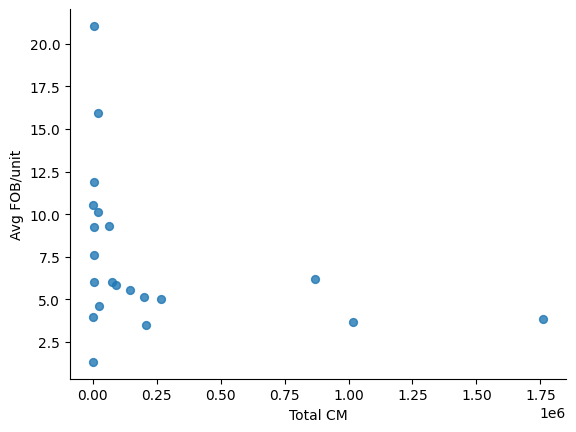

In [20]:
buyer_summary.plot(kind='scatter', x='Total CM', y='Avg FOB/unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

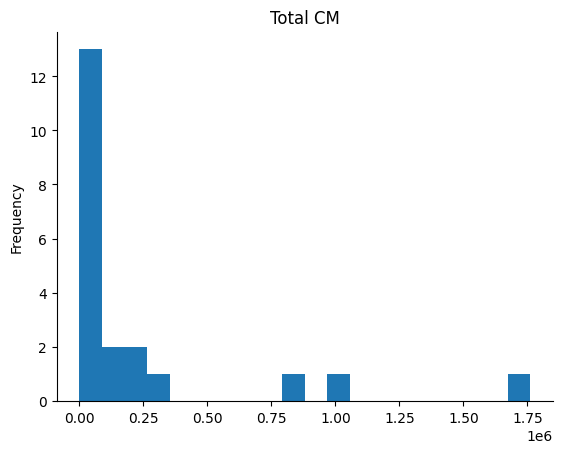

In [21]:
buyer_summary['Total CM'].plot(kind='hist', bins=20, title='Total CM')
plt.gca().spines[['top', 'right',]].set_visible(False)

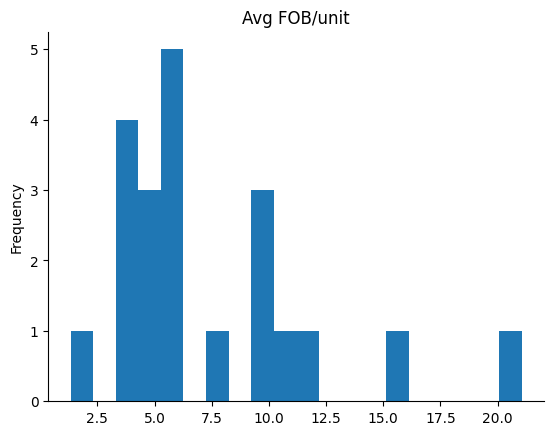

In [22]:
buyer_summary['Avg FOB/unit'].plot(kind='hist', bins=20, title='Avg FOB/unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

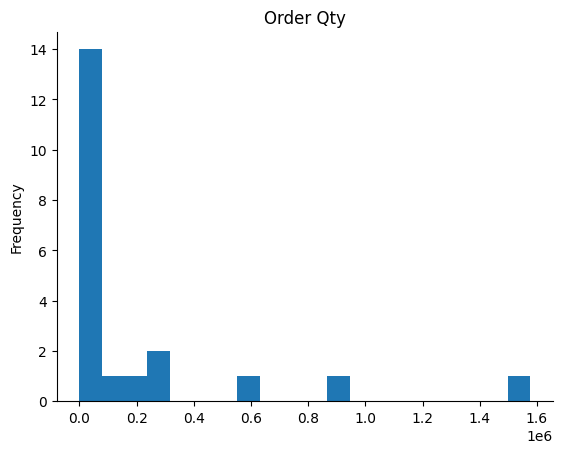

In [23]:
buyer_summary['Order Qty'].plot(kind='hist', bins=20, title='Order Qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

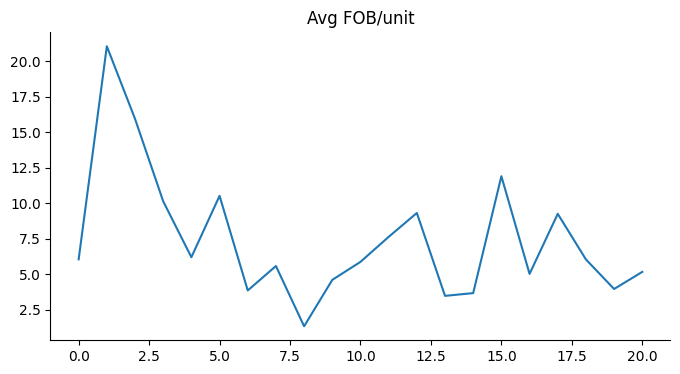

In [25]:
buyer_summary['Avg FOB/unit'].plot(kind='line', figsize=(8, 4), title='Avg FOB/unit')
plt.gca().spines[['top', 'right']].set_visible(False)

## 📊 2. Merchandiser Performance
1. Total orders handled by each merchandiser.

2. Total FOB/CM generated by each merchandiser.

3. Visual: Pie chart of Total CM contribution per merchandiser.

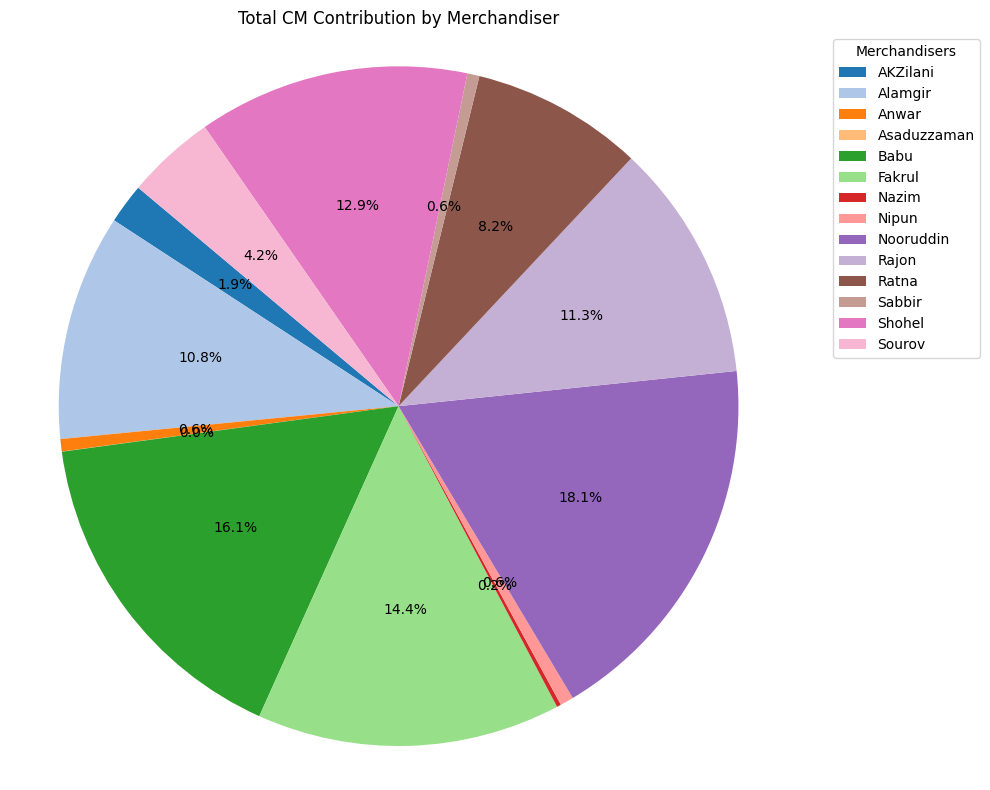

In [28]:
import matplotlib.pyplot as plt

# Pie Chart: Total CM Contribution by Merchandiser
plt.figure(figsize=(10, 8))

# Define colors
colors = plt.cm.tab20.colors  # You can choose another colormap if needed

# Create pie chart without labels (for clarity)
patches, texts, autotexts = plt.pie(
    merch_summary['Total CM'],
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add legend
plt.legend(patches, merch_summary['Merchandiser'], title="Merchandisers", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and formatting
plt.title('Total CM Contribution by Merchandiser')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


In [30]:
# ===== 🧮 Merchandiser Performance Summary =====
merch_summary = df.groupby('Merchandiser').agg({
    'Order Qty': 'count',        # Total orders
    'Total FOB': 'sum',
    'Total CM': 'sum'
}).reset_index()

merch_summary.rename(columns={'Order Qty': 'Total Orders'}, inplace=True)

# Add Average CM per Order
merch_summary['Avg CM/Order'] = merch_summary['Total CM'] / merch_summary['Total Orders']

# Print Summary
print("\n📊 Merchandiser Performance Summary:")
display(merch_summary)



📊 Merchandiser Performance Summary:


,Merchandiser,Total Orders,Total FOB,Total CM,Avg CM/Order
0,AKZilani,27,382635.24,91326.99,3382.481111
1,Alamgir,65,1909721.66,515609.45,7932.453077
2,Anwar,43,141385.70,28175.50,655.244186
3,Asaduzzaman,2,2065.70,404.20,202.100000
4,Babu,150,2368796.92,773875.05,5159.167000
5,Fakrul,192,2484865.17,692595.59,3607.268698
6,Nazim,12,44014.50,9672.57,806.047500
7,Nipun,11,124483.20,30709.12,2791.738182
8,Nooruddin,240,3569602.95,867473.45,3614.472708
9,Rajon,50,2291502.96,544276.14,10885.522800


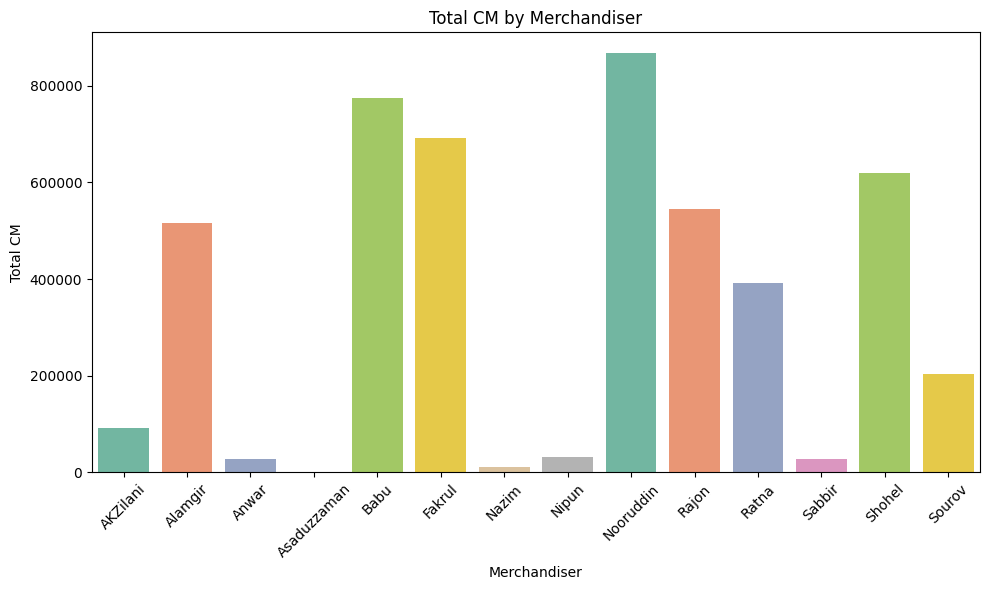

In [31]:

# ===== 📈 Bar Chart of Total CM by Merchandiser =====
plt.figure(figsize=(10, 6))
sns.barplot(data=merch_summary, x='Merchandiser', y='Total CM', palette='Set2')
plt.title('Total CM by Merchandiser')
plt.ylabel('Total CM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


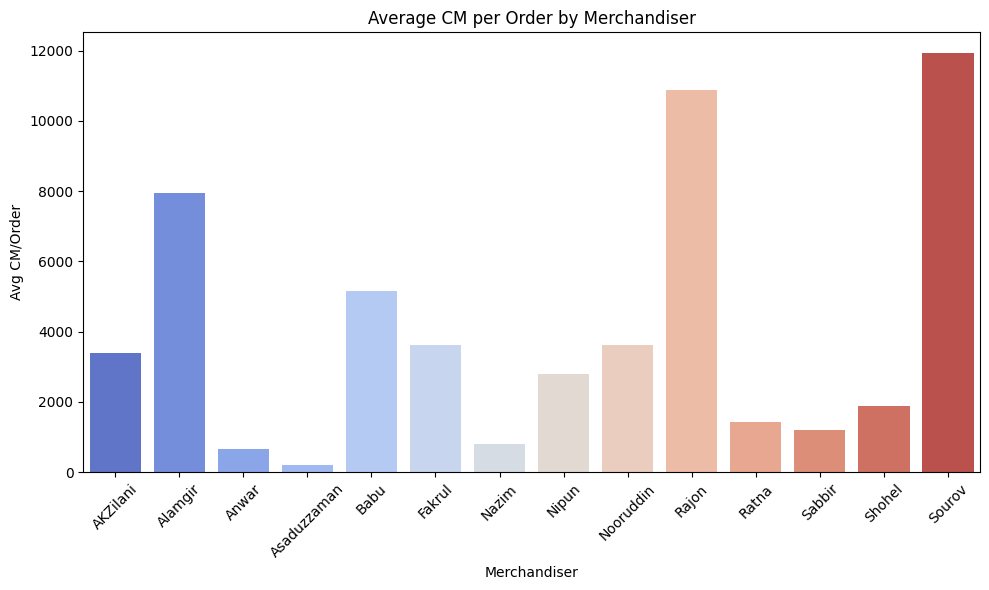

In [32]:

# ===== 📊 Bar Chart of Average CM per Order =====
plt.figure(figsize=(10, 6))
sns.barplot(data=merch_summary, x='Merchandiser', y='Avg CM/Order', palette='coolwarm')
plt.title('Average CM per Order by Merchandiser')
plt.ylabel('Avg CM/Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:

# ===== 📦 Merge with Buyer-Wise Summary =====
buyer_summary = df.groupby(['Buyer', 'Merchandiser']).agg({
    'Order Qty': 'sum',
    'Total FOB': 'sum',
    'Total CM': 'sum'
}).reset_index()

print("\n📦 Buyer-Wise Summary (merged):")
display(buyer_summary)


📦 Buyer-Wise Summary (merged):


,Buyer,Merchandiser,Order Qty,Total FOB,Total CM
0,Best Seller,Anwar,24769.0,141385.70,28175.50
1,Best Seller,Asaduzzaman,322.0,2065.70,404.20
2,Best Seller,Nazim,4624.0,37132.50,7818.57
3,Best Seller,Sabbir,21936.0,134685.86,27637.96
4,Best Seller,Sourov,6669.0,37361.10,10054.35
5,"COLONY BRANDS ,INC",Ratna,1140.0,23998.20,5752.80
6,"Colony Brands, INC",Ratna,4693.0,74809.15,19818.60
7,DK Company,Nazim,600.0,6882.00,1854.00
8,DK Company,Rajon,5950.0,59500.00,20009.69
9,EL CORTE INGLES,Nooruddin,576217.0,3569602.95,867473.45


## 👕 3. Style/Style No Analysis
1. Most frequent styles.

2. Style-wise Total Order Quantity, FOB, and CM.

3. Visual: Horizontal bar plot of top 10 styles by Order Qty or CM.

In [39]:
df.columns

Index(['Order No', 'Order Date', 'Buyer', 'Style No', 'Style Name', 'Season',
       'LC/SC No', 'Merchandiser', 'TOD date', 'Order Qty', 'FOB', 'Total FOB',
       'CM', 'Total CM'],
      dtype='object')


👕 Top 10 Styles by Order Quantity:
                                 Style No  Order Qty   Total FOB   Total CM
3            0925212 - Robin oxford shirt   400867.0  1866907.31  501083.75
50   1257590 - BERT SLIM CA STRETCH SHIRT   268407.0  1138886.68  335440.35
67            1289801 - BERKLEY L/S Shirt   210055.0   528601.25  181403.58
105                               22068 -   195090.0   663306.00  219476.25
120                               46265 -   182240.0   592280.00  209576.00
102                               18471 -   167800.0   612470.00  198004.00
197                           K48R - K48R   149401.0   717238.96  128052.18
73            1298296 - DENICE CORD SKIRT   130399.0   425228.44  135993.13
107                       272781 - 2LS099   106385.0   510648.00  141066.51
2                                 08803 -   103000.0   375950.00  123600.00


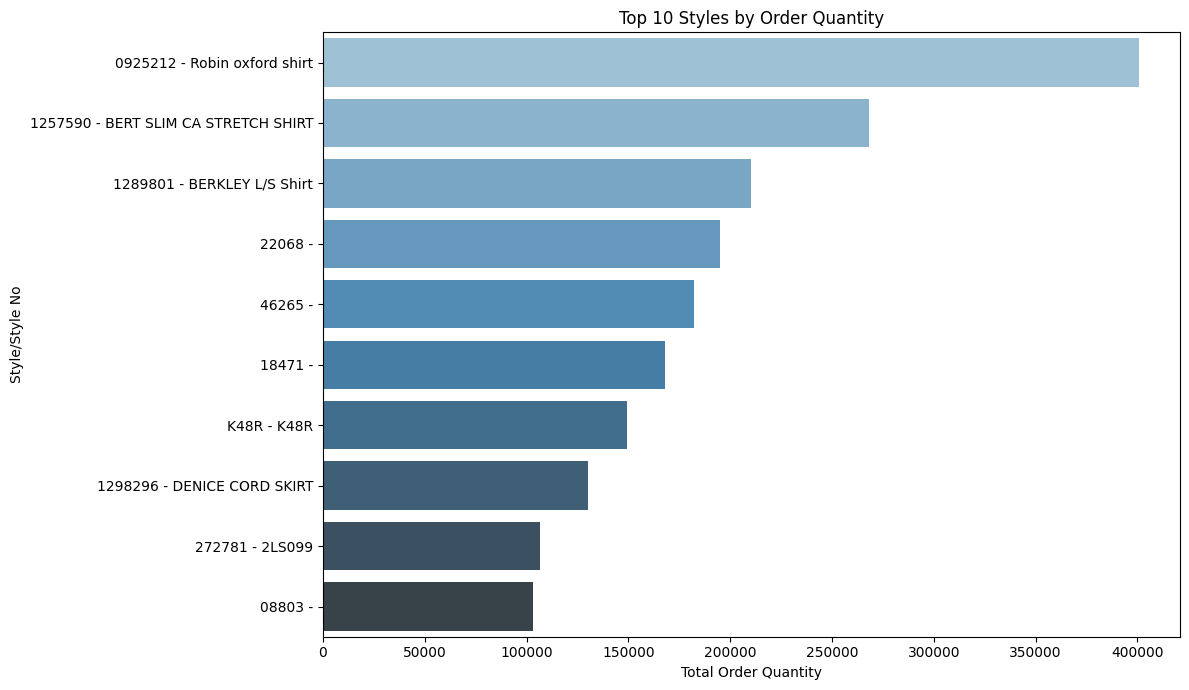

In [40]:
# Correct column name here
style_col = 'Style No'  # Update this based on your output from Step 1

# ===== 👕 Style-wise Summary =====
style_summary = df.groupby(style_col).agg({
    'Order Qty': 'sum',
    'Total FOB': 'sum',
    'Total CM': 'sum'
}).reset_index()

# Sort by Order Qty
top_styles = style_summary.sort_values(by='Order Qty', ascending=False).head(10)

print("\n👕 Top 10 Styles by Order Quantity:")
print(top_styles)

# ===== 📊 Horizontal Bar Chart =====
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_styles,
    y=style_col,
    x='Order Qty',
    palette='Blues_d'
)
plt.title('Top 10 Styles by Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Style/Style No')
plt.tight_layout()
plt.show()


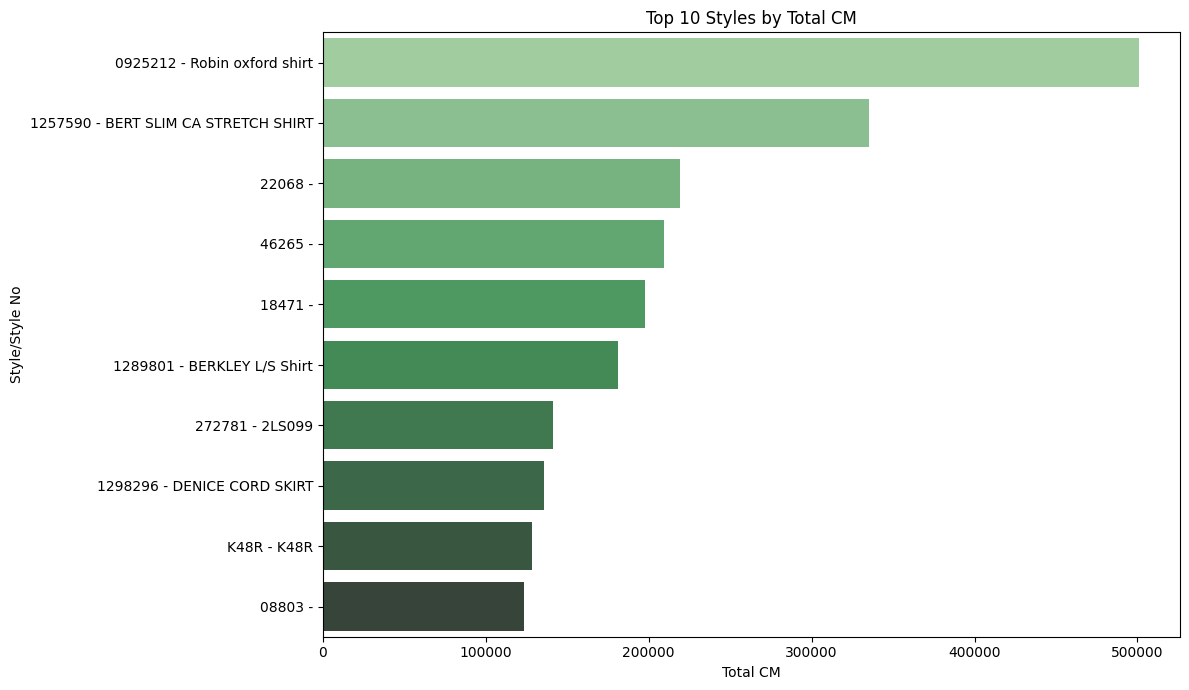

In [42]:
# Top 10 styles by Total CM
top_styles_cm = style_summary.sort_values(by='Total CM', ascending=False).head(10)

# Bar plot by CM
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_styles_cm,
    y=style_col,
    x='Total CM',
    palette='Greens_d'
)
plt.title('Top 10 Styles by Total CM')
plt.xlabel('Total CM')
plt.ylabel('Style/Style No')
plt.tight_layout()
plt.show()


## 📅 4. Time-Based Analysis (TOD Date)
1. Daily order trends.

2. Top dates with highest order qty.

3. Visual: Line chart of daily Order Qty, Total FOB, and Total CM.

In [44]:
df.columns

Index(['Order No', 'Order Date', 'Buyer', 'Style No', 'Style Name', 'Season',
       'LC/SC No', 'Merchandiser', 'TOD date', 'Order Qty', 'FOB', 'Total FOB',
       'CM', 'Total CM'],
      dtype='object')


Top 5 Dates with Highest Order Quantity:
     TOD Date  Order Qty   Total FOB   Total CM
53 2025-06-30   426203.0  1957454.17  546274.83
4  2025-04-21   274582.0  1138236.88  312334.04
6  2025-04-24   163780.0   566056.90  192696.40
9  2025-04-28   156117.0   613559.20  177013.50
30 2025-05-26   153531.0   449856.57  142237.80


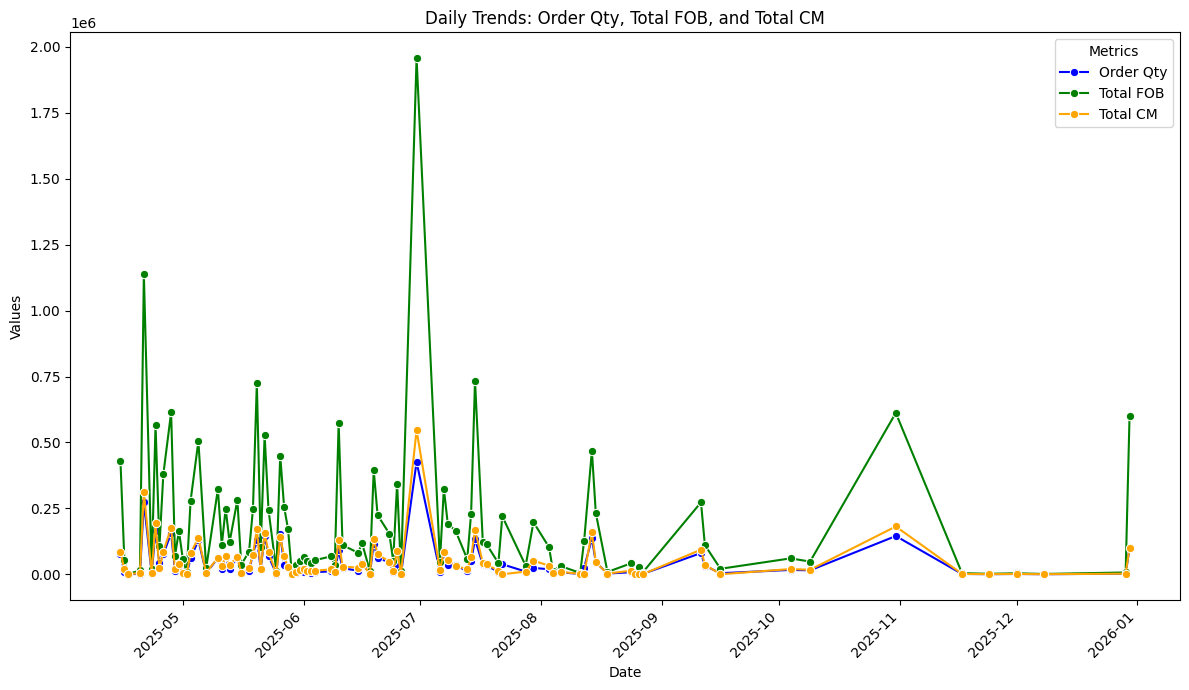

In [46]:
# Ensure 'TOD Date' is a datetime object
df['TOD Date'] = pd.to_datetime(df['TOD date'])

# Clean numeric columns (ensure data consistency for analysis)
for col in ['Order Qty', 'FOB', 'Total FOB', 'CM', 'Total CM']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# ===== 📅 1. Daily Order Trends =====
# Group by 'TOD Date' to calculate total Order Qty, Total FOB, and Total CM per day
daily_trends = df.groupby('TOD Date').agg({
    'Order Qty': 'sum',
    'Total FOB': 'sum',
    'Total CM': 'sum'
}).reset_index()

# ===== 📅 2. Top Dates with Highest Order Quantity =====
top_dates_order_qty = daily_trends.nlargest(5, 'Order Qty')  # Top 5 dates
print("\nTop 5 Dates with Highest Order Quantity:")
print(top_dates_order_qty)

# ===== 📊 3. Line Chart - Daily Order Qty, Total FOB, and Total CM =====
plt.figure(figsize=(12, 7))

# Plotting all three metrics (Order Qty, Total FOB, Total CM)
sns.lineplot(data=daily_trends, x='TOD Date', y='Order Qty', label='Order Qty', color='blue', marker='o')
sns.lineplot(data=daily_trends, x='TOD Date', y='Total FOB', label='Total FOB', color='green', marker='o')
sns.lineplot(data=daily_trends, x='TOD Date', y='Total CM', label='Total CM', color='orange', marker='o')

# Customize chart
plt.title('Daily Trends: Order Qty, Total FOB, and Total CM')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## 📦 5. Order Quantity Distribution
1. Descriptive statistics (mean, median, std) for Order Qty.

2. Detect outliers in Order Qty using box plot.

3. Visual: Histogram or box plot of Order Qty.

In [47]:
# Clean and convert 'Order Qty' column to numeric
df['Order Qty'] = pd.to_numeric(df['Order Qty'], errors='coerce')

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# ===== 📦 1. Descriptive Statistics =====
order_qty_stats = df['Order Qty'].describe()  # Mean, median, std, min, 25%, 50%, 75%, max
print("Descriptive Statistics for Order Qty:")
display(order_qty_stats)



Descriptive Statistics for Order Qty:


,Order Qty
count,1435.000000
mean,2820.284321
std,11593.028903
min,1.000000
25%,205.000000
50%,630.000000
75%,1978.000000
max,334000.000000


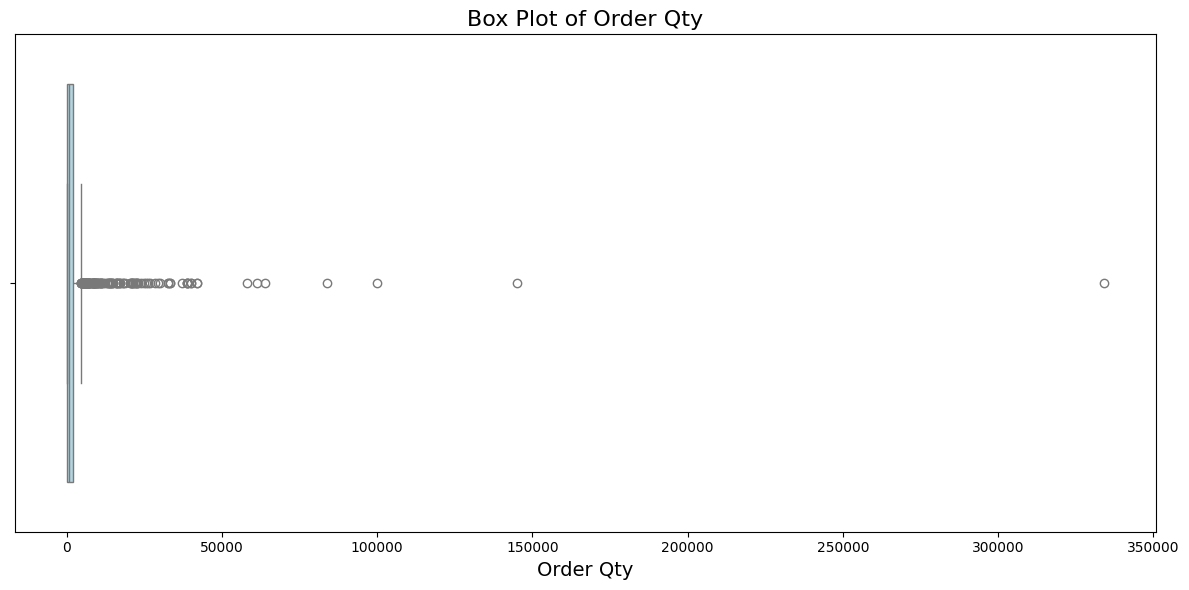

In [52]:
# ===== 📦 2. Detect Outliers using Box Plot =====
plt.figure(figsize=(12, 6))  # Larger figure size for better clarity

# Box plot to visualize outliers
sns.boxplot(data=df, x='Order Qty', color='lightblue')
plt.title('Box Plot of Order Qty', fontsize=16)
plt.xlabel('Order Qty', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()



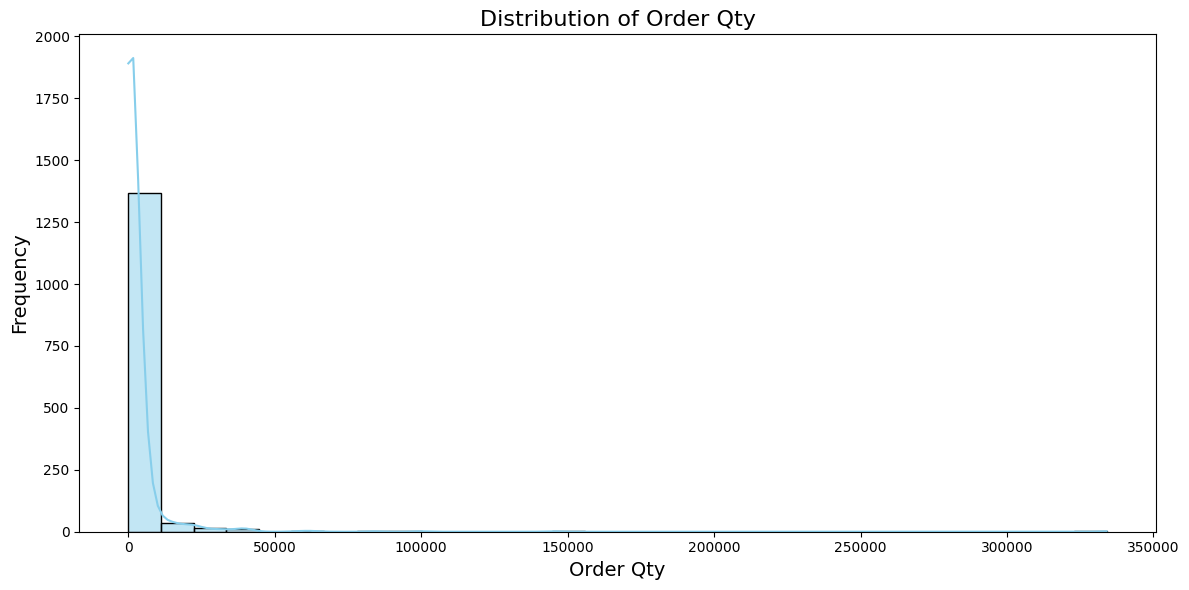

In [53]:
# ===== 📊 3. Visual: Histogram of Order Qty =====
plt.figure(figsize=(12, 6))  # Larger figure size for better clarity

# Histogram of Order Qty with kde and improved binning
sns.histplot(df['Order Qty'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Qty', fontsize=16)
plt.xlabel('Order Qty', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()


## 💰 6. FOB and CM Rate Analysis
1. Average FOB and CM rate per Buyer or per Style.

2. FOB vs CM correlation.

3. Visual: Scatter plot of FOB vs CM.

In [56]:
df.columns

Index(['Order No', 'Order Date', 'Buyer', 'Style No', 'Style Name', 'Season',
       'LC/SC No', 'Merchandiser', 'TOD date', 'Order Qty', 'FOB', 'Total FOB',
       'CM', 'Total CM', 'TOD Date'],
      dtype='object')

In [54]:
# Clean and convert necessary columns to numeric
df['FOB'] = pd.to_numeric(df['FOB'], errors='coerce')
df['CM'] = pd.to_numeric(df['CM'], errors='coerce')

In [57]:
# ===== 💰 1. Average FOB and CM rate per Buyer or per Style =====
# Group by Buyer or Style and calculate mean FOB and CM
buyer_fob_cm_avg = df.groupby('Buyer')[['FOB', 'CM']].mean().reset_index()
style_fob_cm_avg = df.groupby('Style Name')[['FOB', 'CM']].mean().reset_index()

# Print the results
print("Average FOB and CM rate per Buyer:")
print(buyer_fob_cm_avg.head())

print("\nAverage FOB and CM rate per Style:")
print(style_fob_cm_avg.head())


Average FOB and CM rate per Buyer:
                Buyer        FOB        CM
0         Best Seller   6.102333  1.272111
1  COLONY BRANDS ,INC  21.790000  5.160000
2  Colony Brands, INC  16.942857  4.285714
3          DK Company  10.210000  3.718571
4     EL CORTE INGLES   6.567708  1.793333

Average FOB and CM rate per Style:
  Style Name        FOB       CM
0          0   6.020115  1.70273
1     100537   9.250000  3.00000
2    1405960  11.900000  2.00000
3     2BX190   4.400000  1.05000
4     2BX191   4.400000  1.05000



Correlation between FOB and CM:
          FOB        CM
FOB  1.000000  0.677211
CM   0.677211  1.000000


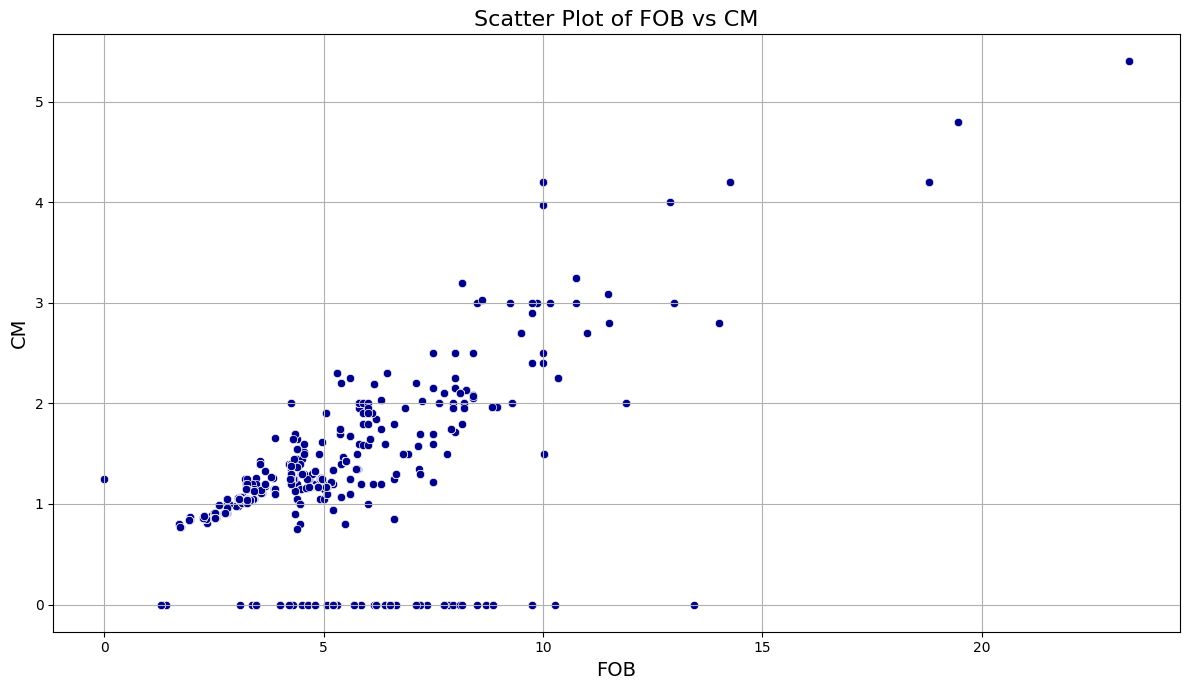

In [60]:
# ===== 💰 2. FOB vs CM Correlation =====
fob_cm_corr = df[['FOB', 'CM']].corr()
print("\nCorrelation between FOB and CM:")
print(fob_cm_corr)

# ===== 📊 3. Visual: Scatter Plot of FOB vs CM =====
plt.figure(figsize=(12, 7))  # Larger figure size for better clarity

# Scatter plot of FOB vs CM
sns.scatterplot(x='FOB', y='CM', data=df, color='darkblue')

# Adding title and axis labels with better readability
plt.title('Scatter Plot of FOB vs CM', fontsize=16)
plt.xlabel('FOB', fontsize=14)
plt.ylabel('CM', fontsize=14)

# Add grid for easier interpretation
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## 📐 7. Season-Wise Analysis
1. Number of styles or order qty per season.

2. Season-wise revenue (Total FOB) and profit (Total CM).

3. Visual: Stacked bar chart by season.


In [61]:
# Clean and convert necessary columns to numeric
df['Order Qty'] = pd.to_numeric(df['Order Qty'], errors='coerce')
df['FOB'] = pd.to_numeric(df['FOB'], errors='coerce')
df['CM'] = pd.to_numeric(df['CM'], errors='coerce')

In [63]:
# ===== 📐 8. Season-Wise Analysis =====
# 1. Number of styles or order qty per season
styles_per_season = df.groupby('Season')['Style Name'].nunique().reset_index(name='Number of Styles')
order_qty_per_season = df.groupby('Season')['Order Qty'].sum().reset_index(name='Total Order Qty')

In [64]:
# 2. Season-wise revenue (Total FOB) and profit (Total CM)
season_wise_revenue_profit = df.groupby('Season')[['FOB', 'CM']].sum().reset_index()

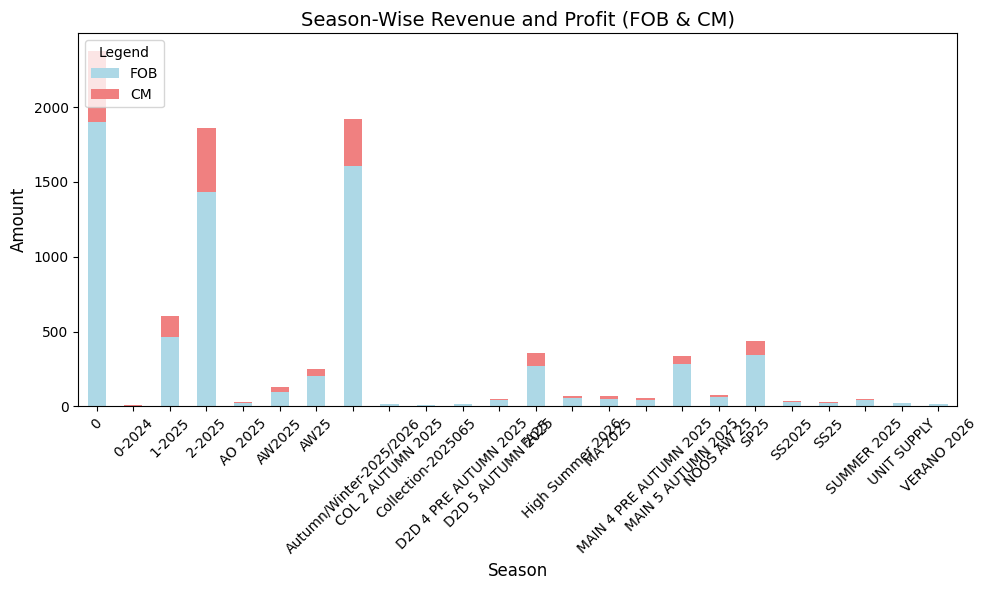

In [70]:
# 3. Visual: Stacked bar chart by season (FOB and CM)
fig, ax = plt.subplots(figsize=(10, 6))
season_wise_revenue_profit.set_index('Season')[['FOB', 'CM']].plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'lightcoral'])

# Add titles and labels
plt.title('Season-Wise Revenue and Profit (FOB & CM)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Legend', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()




In [71]:
# Print Season-wise analysis
print("Season-Wise Analysis:")
print(f"\nNumber of Styles per Season:\n{styles_per_season}")
print(f"\nTotal Order Quantity per Season:\n{order_qty_per_season}")
print(f"\nSeason-wise Revenue (FOB) and Profit (CM):\n{season_wise_revenue_profit}")

Season-Wise Analysis:

Number of Styles per Season:
                     Season  Number of Styles
0                         0                36
1                    0-2024                 1
2                    1-2025                21
3                    2-2025                22
4                   AO 2025                 2
5                    AW2025                 1
6                      AW25                15
7   Autumn/Winter-2025/2026                16
8         COL 2 AUTUMN 2025                 1
9        Collection-2025065                 1
10    D2D 4 PRE AUTUMN 2025                 1
11        D2D 5 AUTUMN 2025                 3
12                     FA25                 1
13         High Summer 2026                 4
14                  MA 2025                 2
15   MAIN 4 PRE AUTUMN 2025                 3
16       MAIN 5 AUTUMN 2025                10
17               NOOS AW 25                 2
18                     SP25                14
19                   SS2025 

**📊 **Sales Analysis Report Based on TODwiseOrderDetails.csv**

---

### 📝 **Overview**

This report helps you understand your sales performance using data from "TODwiseOrderDetails.csv." It highlights key areas like buyer and merchandiser performance, popular styles, seasonal trends, and the relationship between order quantity, FOB (Free on Board), and CM (Contribution Margin).

---

### 🔍 **Key Insights**

- **Top Buyers:** Identifying buyers with the highest order quantities, FOB, and CM to focus on high-performing customers.
  
- **Merchandiser Performance:** Evaluating merchandisers based on total orders, FOB/CM, and average CM per order to recognize top performers.

- **Popular Styles:** Listing the top 10 styles by order quantity and CM to understand customer preferences.

- **Time-Based Trends:** Analyzing daily order trends to identify peak dates for order quantities.

- **Order Quantity Distribution:** Understanding typical order sizes and variability through descriptive statistics and visualizations.

- **FOB & CM Analysis:** Examining the correlation between FOB and CM to assess profitability.

- **Seasonal Performance:** Analyzing performance by season to identify trends and optimize strategies.

---

### 🛠️ **Data Preparation**

- **Missing Data:** Replaced missing values with zeros to ensure completeness.

- **Data Conversion:** Converted numeric and date/time columns for accurate analysis.

- **Data Cleaning:** Removed commas from numbers and replaced hyphens with NaN to ensure correct calculations.

---

### 💡 **Recommendations**

- **Engage High-Performing Buyers and Merchandisers:** Focus efforts on top buyers and merchandisers to boost performance further.

- **Analyze Order Quantity Trends:** Investigate factors behind the distribution of order quantities, especially the outliers.

- **Style Optimization:** Use insights from top-selling styles to improve inventory and marketing strategies.

- **Leverage Seasonal Insights:** Utilize seasonal trends to predict demand and optimize inventory management.

---

### 📌 **Additional Notes**

- The report includes detailed tables and visualizations of various metrics.

- Insights from this analysis can inform decisions around inventory, pricing, marketing, and sales strategies.

---

**📌 Quick Tip:** To make your report more engaging, consider using customizable templates that allow you to add visuals, charts, and branding elements. linkturn0search0

---